In [32]:
# References:
# https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d
# https://stackoverflow.com/questions/1793532/how-do-i-determine-k-when-using-k-means-clustering

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

articles=['analysis data text normalization statistics technology','ai learning machine artificial intelligence','artificial intelligence ai','money bank','money bank','finance technology','fund bank money','basket ball player','diving stroke breathing','swing net ball player']
titles=['Data Science','Artificial intelligence','Machine Learning','European Central Bank','Bank','Financial technology','International Monetary Fund','Basketball','Swimming','Tennis']

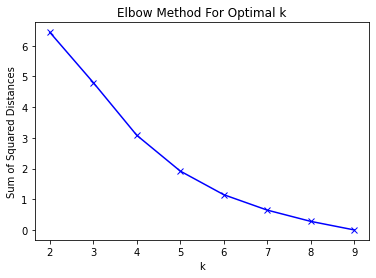

In [33]:
# Represent each document as a vector
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(articles)

# Using elbow method to determine the number of clusters
Sum_of_squared_distances = []
K = range(2,10)
best_cluster_no = 0                       # best cluster number which you will get
previous_silh_avg = 0.0

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
    # To determine the most optimal number of clusters automatically (without looking at the graph)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    if silhouette_avg > previous_silh_avg:
        previous_silh_avg = silhouette_avg
        best_cluster_no = k

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
# Perform k-means clustering
model = KMeans(n_clusters=best_cluster_no, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
cls=pd.DataFrame(list(zip(titles,labels)),columns=['title','cluster'])
print(cls.sort_values(by=['cluster']))

                         title  cluster
7                   Basketball        0
9                       Tennis        0
3        European Central Bank        1
4                         Bank        1
6  International Monetary Fund        1
1      Artificial intelligence        2
2             Machine Learning        2
0                 Data Science        3
5         Financial technology        3
8                     Swimming        4
